In [10]:
from matplotlib import pyplot as plt
import numpy as np
import meep as mp
import math
import cmath

shape_size = 48
sx, sy, sz = 1, 1, 4
h = 1.25
dpml = 0.5
b_m, c_m = 1.4, 3.54
res = 15
echo = 1000
cell_size = mp.Vector3(sx,sy,sz)
fcen = 0.5
df = 0.2
theta = math.radians(0)
nfreq = 200

# k with correct length (plane of incidence: XZ) 
k = mp.Vector3(math.sin(theta),0,math.cos(theta)).scale(fcen)
def pw_amp(k, x0):
    def _pw_amp(x):
        return cmath.exp(1j * 2 * math.pi * k.dot(x + x0))
    return _pw_amp

def get_spec():  
    for r in np.arange(0.05, 0.3, 0.05):
        hole = mp.Cylinder(radius= r,height=h, material=mp.Medium(index = b_m))
#         bend = get_bend()
#         Ts = []
#         st = np.genfromtxt('data/straight.txt')
#         freq = np.genfromtxt('data/freq.txt')
#         for j in range(nfreq):
#             Ts = np.append(Ts, bend[j]/st[j])
#         print('Cylinder radius of 0.3 without holes')         
#         plt.plot(freq,Ts)
#         plt.show()  
        bend = get_bend(hole)
        Ts = []
        st = np.genfromtxt('data/straight.txt')
        freq = np.genfromtxt('data/freq.txt')
        for j in range(nfreq):
            Ts = np.append(Ts, bend[j]/st[j])
        print('Cylinder radius of 0.3 with holes of radius '+str(r))         
        plt.plot(freq,Ts)
        plt.show()  
                    
def get_bend(hole = None):
    geometry = [mp.Block(size = cell_size, material=mp.Medium(index=b_m)),
                mp.Cylinder(radius= 0.3,height=h, material=mp.Medium(index = c_m)
#                 mp.Prism(vertices, 
#                          height=h, 
#                          material=mp.Medium(index=c_m),
#                          center=mp.Vector3()
                        )]
    if hole is not None:
        geometry.append(hole)
    pml_layers = [mp.PML(thickness=1, direction = mp.Z, side=mp.High),
                  mp.Absorber(thickness=1,direction = mp.Z, side=mp.Low)]
    src_pos = -(sz/2 - dpml - 0.5)
    src = [mp.Source(src = mp.GaussianSource(fcen, fwidth=df),
                     component = mp.Ey,
                     center = mp.Vector3(0,0,src_pos),
                     size = mp.Vector3(sx,sy,0),
                     amp_func=pw_amp(k,mp.Vector3(0,0,src_pos)))]
    sim = mp.Simulation(resolution=res,
                        cell_size=cell_size,
                        boundary_layers=pml_layers,
                        sources=src,
                        geometry=geometry,
                        k_point=k)
    freg = mp.FluxRegion(center=mp.Vector3(0,0,-src_pos),
                         size = mp.Vector3(sx,sy,0))
    trans = sim.add_flux(fcen, df, nfreq, freg)
    sim.run(until = echo)
    bend = mp.get_fluxes(trans)
    return bend

-----------
Initializing structure...
Meep: using complex fields.
Meep progress: 18.966666666666665/1000.0 = 1.9% done in 4.0s, 207.1s to go
Meep progress: 38.166666666666664/1000.0 = 3.8% done in 8.0s, 201.7s to go
Meep progress: 57.86666666666667/1000.0 = 5.8% done in 12.0s, 195.6s to go
Meep progress: 76.6/1000.0 = 7.7% done in 16.0s, 193.1s to go
Meep progress: 95.96666666666667/1000.0 = 9.6% done in 20.0s, 188.6s to go
Meep progress: 115.73333333333333/1000.0 = 11.6% done in 24.0s, 183.6s to go
Meep progress: 135.86666666666667/1000.0 = 13.6% done in 28.0s, 178.3s to go
Meep progress: 156.0/1000.0 = 15.6% done in 32.0s, 173.3s to go
Meep progress: 174.93333333333334/1000.0 = 17.5% done in 36.0s, 170.0s to go
Meep progress: 195.26666666666665/1000.0 = 19.5% done in 40.0s, 165.0s to go
Meep progress: 215.4/1000.0 = 21.5% done in 44.0s, 160.4s to go
Meep progress: 235.79999999999998/1000.0 = 23.6% done in 48.0s, 155.7s to go
Meep progress: 255.86666666666667/1000.0 = 25.6% done in 52

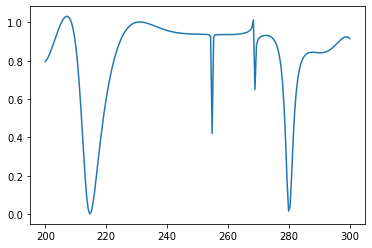

In [12]:
bend = get_bend()
Ts = []
st = np.genfromtxt('data/straight.txt')
freq = np.genfromtxt('data/freq.txt')
for j in range(nfreq):
    Ts = np.append(Ts, bend[j]/st[j])
print('Cylinder radius of 0.3 without holes')         
plt.plot(freq,Ts)
plt.show()  

-----------
Initializing structure...
Meep: using complex fields.
Meep progress: 19.633333333333333/1000.0 = 2.0% done in 4.0s, 200.0s to go
Meep progress: 39.733333333333334/1000.0 = 4.0% done in 8.0s, 193.6s to go
Meep progress: 60.03333333333333/1000.0 = 6.0% done in 12.0s, 188.1s to go
Meep progress: 79.43333333333334/1000.0 = 7.9% done in 16.0s, 185.7s to go
Meep progress: 98.66666666666667/1000.0 = 9.9% done in 20.0s, 182.9s to go
Meep progress: 117.36666666666666/1000.0 = 11.7% done in 24.0s, 180.7s to go
Meep progress: 134.5/1000.0 = 13.4% done in 28.0s, 180.4s to go
Meep progress: 150.1/1000.0 = 15.0% done in 32.0s, 181.5s to go
Meep progress: 165.46666666666667/1000.0 = 16.5% done in 36.1s, 181.8s to go
Meep progress: 182.73333333333332/1000.0 = 18.3% done in 40.1s, 179.1s to go
Meep progress: 200.2/1000.0 = 20.0% done in 44.1s, 176.0s to go
Meep progress: 217.43333333333334/1000.0 = 21.7% done in 48.1s, 173.0s to go
Meep progress: 234.86666666666667/1000.0 = 23.5% done in 52

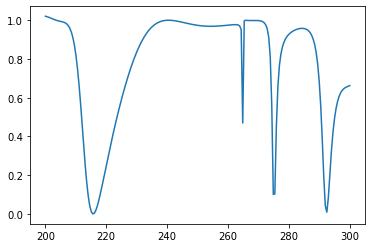

-----------
Initializing structure...
Meep: using complex fields.
Meep progress: 17.3/1000.0 = 1.7% done in 4.0s, 227.3s to go
Meep progress: 35.96666666666667/1000.0 = 3.6% done in 8.0s, 214.5s to go
Meep progress: 54.233333333333334/1000.0 = 5.4% done in 12.0s, 209.5s to go
Meep progress: 72.23333333333333/1000.0 = 7.2% done in 16.0s, 205.7s to go
Meep progress: 90.46666666666667/1000.0 = 9.0% done in 20.0s, 201.3s to go
Meep progress: 109.13333333333333/1000.0 = 10.9% done in 24.0s, 196.1s to go
Meep progress: 128.0/1000.0 = 12.8% done in 28.0s, 190.9s to go
Meep progress: 146.06666666666666/1000.0 = 14.6% done in 32.0s, 187.2s to go
Meep progress: 164.96666666666667/1000.0 = 16.5% done in 36.0s, 182.4s to go
Meep progress: 183.63333333333333/1000.0 = 18.4% done in 40.0s, 178.0s to go
Meep progress: 202.16666666666666/1000.0 = 20.2% done in 44.0s, 173.8s to go
Meep progress: 220.03333333333333/1000.0 = 22.0% done in 48.0s, 170.3s to go
Meep progress: 238.56666666666666/1000.0 = 23.9

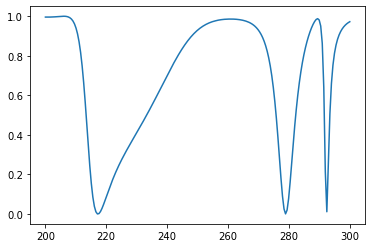

-----------
Initializing structure...
Meep: using complex fields.
Meep progress: 17.933333333333334/1000.0 = 1.8% done in 4.0s, 219.1s to go
Meep progress: 36.13333333333333/1000.0 = 3.6% done in 8.0s, 213.4s to go
Meep progress: 54.9/1000.0 = 5.5% done in 12.0s, 206.6s to go
Meep progress: 73.66666666666667/1000.0 = 7.4% done in 16.0s, 201.3s to go
Meep progress: 92.4/1000.0 = 9.2% done in 20.0s, 196.5s to go
Meep progress: 110.1/1000.0 = 11.0% done in 24.0s, 194.1s to go
Meep progress: 128.76666666666665/1000.0 = 12.9% done in 28.0s, 189.6s to go
Meep progress: 146.96666666666667/1000.0 = 14.7% done in 32.0s, 185.9s to go
Meep progress: 165.03333333333333/1000.0 = 16.5% done in 36.0s, 182.3s to go
Meep progress: 183.13333333333333/1000.0 = 18.3% done in 40.0s, 178.6s to go
Meep progress: 201.73333333333332/1000.0 = 20.2% done in 44.0s, 174.3s to go
Meep progress: 220.1/1000.0 = 22.0% done in 48.0s, 170.2s to go
Meep progress: 238.9/1000.0 = 23.9% done in 52.0s, 165.8s to go
Meep prog

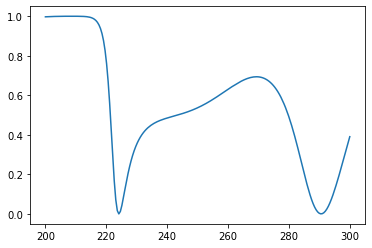

-----------
Initializing structure...
Meep: using complex fields.
Meep progress: 19.7/1000.0 = 2.0% done in 4.0s, 199.3s to go
Meep progress: 39.7/1000.0 = 4.0% done in 8.0s, 193.6s to go
Meep progress: 59.6/1000.0 = 6.0% done in 12.0s, 189.5s to go
Meep progress: 80.03333333333333/1000.0 = 8.0% done in 16.0s, 184.1s to go
Meep progress: 100.36666666666666/1000.0 = 10.0% done in 20.0s, 179.4s to go
Meep progress: 120.39999999999999/1000.0 = 12.0% done in 24.0s, 175.5s to go
Meep progress: 140.83333333333334/1000.0 = 14.1% done in 28.0s, 171.0s to go
Meep progress: 161.33333333333334/1000.0 = 16.1% done in 32.0s, 166.5s to go
Meep progress: 181.73333333333332/1000.0 = 18.2% done in 36.0s, 162.2s to go
Meep progress: 201.8/1000.0 = 20.2% done in 40.0s, 158.4s to go
Meep progress: 222.0/1000.0 = 22.2% done in 44.0s, 154.3s to go
Meep progress: 242.5/1000.0 = 24.2% done in 48.0s, 150.1s to go
Meep progress: 262.96666666666664/1000.0 = 26.3% done in 52.0s, 145.9s to go
Meep progress: 283.06

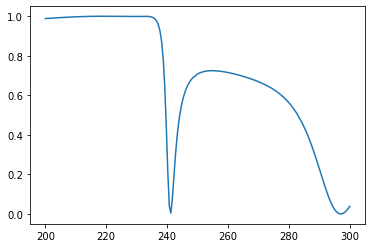

-----------
Initializing structure...
Meep: using complex fields.
Meep progress: 19.7/1000.0 = 2.0% done in 4.0s, 199.2s to go
Meep progress: 40.06666666666666/1000.0 = 4.0% done in 8.0s, 191.9s to go
Meep progress: 60.46666666666667/1000.0 = 6.0% done in 12.0s, 186.6s to go
Meep progress: 80.7/1000.0 = 8.1% done in 16.0s, 182.4s to go
Meep progress: 101.13333333333333/1000.0 = 10.1% done in 20.0s, 177.9s to go
Meep progress: 121.56666666666666/1000.0 = 12.2% done in 24.0s, 173.6s to go
Meep progress: 141.8/1000.0 = 14.2% done in 28.0s, 169.6s to go
Meep progress: 161.96666666666667/1000.0 = 16.2% done in 32.0s, 165.7s to go
Meep progress: 182.5/1000.0 = 18.2% done in 36.0s, 161.4s to go
Meep progress: 203.0/1000.0 = 20.3% done in 40.0s, 157.2s to go
Meep progress: 223.29999999999998/1000.0 = 22.3% done in 44.0s, 153.2s to go
Meep progress: 243.43333333333334/1000.0 = 24.3% done in 48.0s, 149.3s to go
Meep progress: 263.6/1000.0 = 26.4% done in 52.0s, 145.4s to go
Meep progress: 284.03

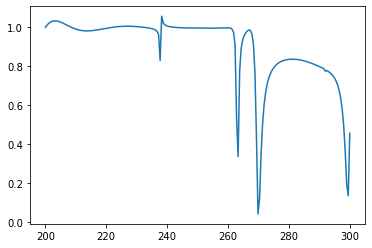

In [11]:
get_spec()

Cylinder radius of 0.3 with holes of radius 0.25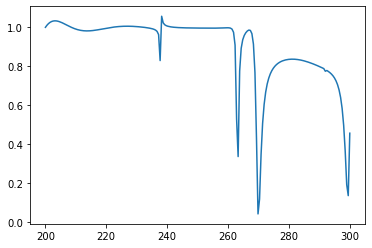

Cylinder radius of 0.3 with holes of radius 0.2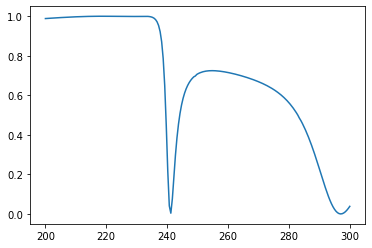

Cylinder radius of 0.3 with holes of radius 0.15000000000000002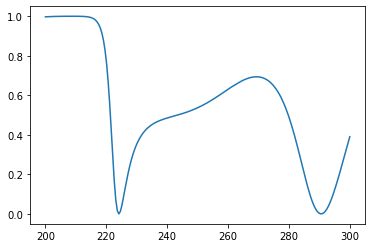

Cylinder radius of 0.3 with holes of radius 0.1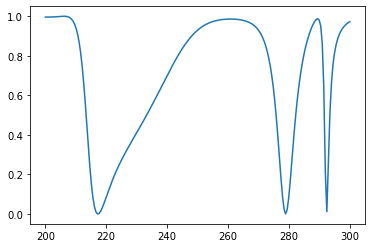

Cylinder radius of 0.3 with holes of radius 0.05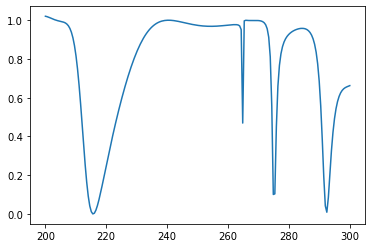